In [35]:
import pandas as pd

In [45]:
df = pd.read_csv("6_0828_2044.csv")

In [46]:
young = [0,1,2]
middle = [3,4,5,6,7,8]
old = [9]

df.loc[df[df["pred"].isin(young)].index,"pred_slim"] = 0
df.loc[df[df["pred"].isin(middle)].index,"pred_slim"] = 1
df.loc[df[df["pred"].isin(old)].index,"pred_slim"] = 2

df.loc[df[df["label"].isin(young)].index,"label_slim"] = 0
df.loc[df[df["label"].isin(middle)].index,"label_slim"] = 1
df.loc[df[df["label"].isin(old)].index,"label_slim"] = 2

#  return_df["c_age_deep"] = 0
#     return_df.loc[return_df.query("20 <= age < 25 ").index, "c_age_deep"] = 1
#     return_df.loc[return_df.query("25 <= age < 30 ").index, "c_age_deep"] = 2
#     return_df.loc[return_df.query("30 <= age < 35 ").index, "c_age_deep"] = 3
#     return_df.loc[return_df.query("35 <= age < 40 ").index, "c_age_deep"] = 4
#     return_df.loc[return_df.query("40 <= age < 45 ").index, "c_age_deep"] = 5
#     return_df.loc[return_df.query("45 <= age < 50 ").index, "c_age_deep"] = 6
#     return_df.loc[return_df.query("50 <= age < 55 ").index, "c_age_deep"] = 7
#     return_df.loc[return_df.query("55 <= age < 60 ").index, "c_age_deep"] = 8
#     return_df.loc[return_df.query("age == 60 ").index, "c_age_deep"] = 9
df.query("pred_slim != label_slim")

,pred,label,path,pred_slim,label_slim
6,2,7,001082_female_Asian_51_normal,0.0,1.0
9,4,1,001004_female_Asian_23_mask3,1.0,0.0
10,8,9,005025_female_Asian_60_mask2,1.0,2.0
26,9,8,003554_female_Asian_59_normal,2.0,1.0
27,2,4,003882_female_Asian_36_mask2,0.0,1.0
...,...,...,...,...,...
3751,2,3,005293_male_Asian_31_mask2,0.0,1.0
3755,8,9,004458_female_Asian_60_mask3,1.0,2.0
3761,9,8,003841_female_Asian_58_mask4,2.0,1.0
3773,2,7,003759_male_Asian_50_incorrect,0.0,1.0


In [41]:
from sklearn.metrics import f1_score

f1_score(df["label_slim"], df["pred_slim"], average='macro')

0.802591937429571

In [42]:
df = pd.read_csv("6_0828_1944.csv")

label_dict = {0: "마스크쓴 남성 청년",
          1: "마스크쓴 남성 중년",
          2: "마스크쓴 남성 노년",
          3: "마스크쓴 여성 청년",
          4: "마스크쓴 여성 중년",
          5: "마스크쓴 여성 노년",

          6: "잘못쓴 남성 청년",
          7: "잘못쓴 남성 중년",
          8: "잘못쓴 남성 노년",
          9: "잘못쓴 여성 청년",
          10: "잘못쓴 여성 중년",
          11: "잘못쓴 여성 노년",

          12: "안쓴 남성 청년",
          13: "안쓴 남성 중년",
          14: "안쓴 남성 노년",
          15: "안쓴 여성 청년",
          16: "안쓴 여성 중년",
          17: "안쓴 여성 노년",
}

df["pred_des"] = df["pred"].replace(label_dict)
df["label_des"] = df["label"].replace(label_dict)
print(len(df))
df.query("pred != label")

3776


,Unnamed: 0,pred,label,path,pred_des,label_des
0,0,2,1,004348_male_Asian_59_mask2,마스크쓴 남성 노년,마스크쓴 남성 중년
1,1,0,1,004420_female_Asian_32_normal,마스크쓴 남성 청년,마스크쓴 남성 중년
19,19,1,0,005051_female_Asian_26_mask5,마스크쓴 남성 중년,마스크쓴 남성 청년
21,21,1,2,004384_female_Asian_60_mask3,마스크쓴 남성 중년,마스크쓴 남성 노년
32,32,1,2,004215_female_Asian_60_mask3,마스크쓴 남성 중년,마스크쓴 남성 노년
...,...,...,...,...,...,...
3680,3680,0,1,001009_female_Asian_40_mask4,마스크쓴 남성 청년,마스크쓴 남성 중년
3687,3687,1,0,001058_female_Asian_28_incorrect,마스크쓴 남성 중년,마스크쓴 남성 청년
3695,3695,1,2,004264_female_Asian_60_mask1,마스크쓴 남성 중년,마스크쓴 남성 노년
3724,3724,1,2,004276_female_Asian_60_incorrect,마스크쓴 남성 중년,마스크쓴 남성 노년


In [43]:
f1_score(df["label"], df["pred"], average='macro')

0.7979941220804366

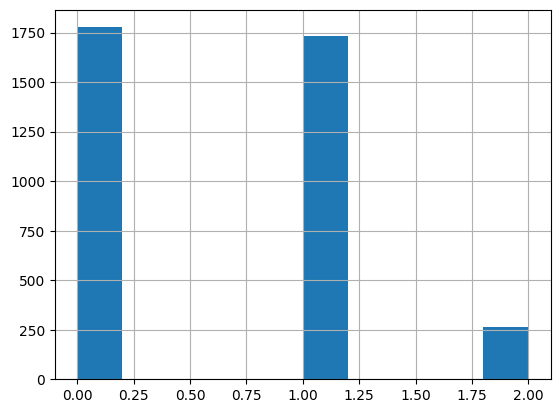

In [19]:
import matplotlib.pyplot as plt

df["label"].hist()
plt.show()

In [11]:
df.query("pred != label").groupby(["pred","label"]).count()

Unnamed: 0  path  pred_des  label_des
pred label                                       
0    1             154   154       154        154
1    0              12    12        12         12
     2             112   112       112        112
2    1              71    71        71         71

In [22]:
df = pd.read_csv("7_0828_1946.csv")
df.query("pred != label")

,Unnamed: 0,pred,label,path
0,0,2,1,001710_male_Asian_58_mask3
14,14,1,2,004384_female_Asian_60_mask3
16,16,1,2,005459_male_Asian_60_mask2
18,18,0,1,001574_female_Asian_34_incorrect
30,30,2,1,003558_female_Asian_45_incorrect
...,...,...,...,...
3739,3739,2,1,000030_female_Asian_55_incorrect
3748,3748,0,1,003889_female_Asian_35_mask1
3749,3749,2,1,001133_male_Asian_56_incorrect
3761,3761,2,1,003561_male_Asian_52_mask2


In [23]:
df.query("pred != label").groupby(["pred","label"]).count()

Unnamed: 0  path
pred label                  
0    1              67    67
     2               2     2
1    0              52    52
     2              80    80
2    0               1     1
     1             207   207

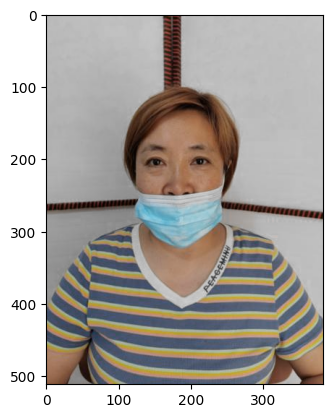

In [296]:
from PIL import Image

import albumentations as A
import cv2

raw_image = cv2.imread("input/data/train/images/000001_female_Asian_45/incorrect_mask.jpg")
image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

# plt.imshow(image)

# # Declare an augmentation pipeline
transform = A.Compose([
#     A.CenterCrop(width=300, height=350),
#     A.HorizontalFlip(p=0.5),
#     A.RandomBrightnessContrast(p=0.7),
    A.HueSaturationValue(hue_shift_limit = 10 ,p=1)

])

augmented = transform(image=image) 

image = augmented['image']

plt.imshow(image)
plt.show()

In [228]:
!nvidia-smi

Fri Aug 27 05:55:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.80.02    Driver Version: 450.80.02    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  Off  | 00000000:00:05.0 Off |                  Off |
| N/A   39C    P0    38W / 250W |  13033MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [139]:
import pandas as pd

df = pd.read_csv("input/data/train/train.csv")

import glob

train_peoples_path = "./input/data/train/images/*"
people_paths = glob.glob(train_peoples_path)
people_names = [name.split("/")[-1] for name in people_paths ]

mask_state_df = pd.DataFrame()

for path in people_paths:
    name = path.split("/")[-1]
    images_path = glob.glob(path + "/*")
    for path in images_path:
        img_name = path.split("/")[-1]
        state = path.split("/")[-1].split(".")[0]
        mask_state_df.loc[len(mask_state_df),["path", "img_path", "state", "img_name"]] = name, path, state, img_name
        


,id,gender,race,age,path,img_path,state,img_name,label
0,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,incorrect,incorrect_mask.jpg,10
1,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,mask2,mask2.jpg,4
2,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,normal,normal.jpg,16
3,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,mask3,mask3.jpg,4
4,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,mask4,mask4.jpg,4
...,...,...,...,...,...,...,...,...,...
14170,005092,male,Asian,52,005092_male_Asian_52,./input/data/train/images/005092_male_Asian_52...,normal,normal.jpg,13
14171,005092,male,Asian,52,005092_male_Asian_52,./input/data/train/images/005092_male_Asian_52...,mask3,mask3.jpg,1
14172,005092,male,Asian,52,005092_male_Asian_52,./input/data/train/images/005092_male_Asian_52...,mask4,mask4.jpg,1
14173,005092,male,Asian,52,005092_male_Asian_52,./input/data/train/images/005092_male_Asian_52...,mask1,mask1.jpg,1


In [325]:
train_df = pd.merge(df, mask_state_df, how= "outer", on = "path")
# print(train_df)
train_df.loc[train_df.query("state == 'incorrect_mask'").index, "state"] = "incorrect"

# 라벨링
train_df["label"] = 0
train_df.loc[train_df.query("state == 'incorrect'").index, "label"] += 6
train_df.loc[train_df.query("state == 'normal'").index, "label"] += 12

train_df.loc[train_df.query("gender == 'female'").index, "label"] += 3

train_df.loc[train_df.query("30 <= age < 60 ").index, "label"] += 1
train_df.loc[train_df.query("age == 60 ").index, "label"] += 2

split_num = int(2700*3/4) * 7
valid_df = train_df.iloc[split_num:]
train_df = train_df.iloc[:split_num]

# valid_df = train_df.iloc[200:]
# train_df = train_df.iloc[:200]

train_df

,id,gender,race,age,path,img_path,state,img_name,label
0,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,incorrect,incorrect_mask.jpg,10
1,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,mask2,mask2.jpg,4
2,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,normal,normal.jpg,16
3,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,mask3,mask3.jpg,4
4,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,mask4,mask4.jpg,4
...,...,...,...,...,...,...,...,...,...
14170,005092,male,Asian,52,005092_male_Asian_52,./input/data/train/images/005092_male_Asian_52...,normal,normal.jpg,13
14171,005092,male,Asian,52,005092_male_Asian_52,./input/data/train/images/005092_male_Asian_52...,mask3,mask3.jpg,1
14172,005092,male,Asian,52,005092_male_Asian_52,./input/data/train/images/005092_male_Asian_52...,mask4,mask4.jpg,1
14173,005092,male,Asian,52,005092_male_Asian_52,./input/data/train/images/005092_male_Asian_52...,mask1,mask1.jpg,1


In [326]:
train_df["id_label"] = train_df["label"].apply(str) + "_" + train_df["id"]

from torch.utils.data import Dataset, DataLoader
from PIL import Image

class Maskset(Dataset):
    def __init__(self, df, transform = None):
        self.df = df
        self.transform = transform
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img = Image.open(self.df["img_path"].iloc[idx])
        if self.transform:
            x = self.transform(img)
        else:
            x = transforms.ToTensor()(img)
        y = torch.tensor(self.df["label"].iloc[idx], dtype=torch.long)
        z = self.df["id_label"].iloc[idx]
        return x, y, z 

In [328]:
from torchvision import transforms

transform = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.Resize(224),
# #     transforms.CenterCrop(224),
    transforms.ToTensor()
     ,
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
train_df = train_df.iloc[:5000]
train_set = Maskset(train_df)
# valid_set = Maskset(valid_df, transform)
# train_set = Maskset(train_df, transform)
# valid_set = Maskset(valid_df, transform)

In [329]:
len(train_set)

5000

In [332]:
train_df

,id,gender,race,age,path,img_path,state,img_name,label,id_label
0,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,incorrect,incorrect_mask.jpg,10,10_000001
1,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,mask2,mask2.jpg,4,4_000001
2,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,normal,normal.jpg,16,16_000001
3,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,mask3,mask3.jpg,4,4_000001
4,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,mask4,mask4.jpg,4,4_000001
...,...,...,...,...,...,...,...,...,...,...
4995,001442,female,Asian,43,001442_female_Asian_43,./input/data/train/images/001442_female_Asian_...,mask4,mask4.jpg,4,4_001442
4996,001442,female,Asian,43,001442_female_Asian_43,./input/data/train/images/001442_female_Asian_...,mask1,mask1.jpg,4,4_001442
4997,001442,female,Asian,43,001442_female_Asian_43,./input/data/train/images/001442_female_Asian_...,mask5,mask5.jpg,4,4_001442
4998,001443,female,Asian,45,001443_female_Asian_45,./input/data/train/images/001443_female_Asian_...,incorrect,incorrect_mask.jpg,10,10_001443


In [333]:
len(train_df["label"])

5000

In [334]:
import numpy as np

labes_unique, counts = np.unique(train_df["label"], return_counts = True)

In [303]:
sorted(counts)

[6,
 6,
 7,
 7,
 30,
 35,
 110,
 110,
 119,
 119,
 129,
 129,
 343,
 344,
 550,
 595,
 645,
 1716]

In [335]:
labes_unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [336]:
counts

array([ 645,  550,   35,  595, 1716,   30,  129,  110,    7,  119,  344,
          6,  129,  110,    7,  119,  343,    6])

In [337]:
labes_unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [338]:
class_weights = [sum(counts) / c for c in counts]
example_weights = [class_weights[e] for e in train_df["label"]]

In [339]:
from torch.utils.data import WeightedRandomSampler

sampler = WeightedRandomSampler(example_weights, len(train_df["label"]))

In [340]:
sampler_loader = DataLoader(train_set, sampler = sampler, batch_size =10000)
temp = []

In [341]:
sampler_img, sampler_label, sampler_id = next(iter(sampler_loader))

In [342]:
type(sampler_id)

tuple

In [350]:
train_df

,id,gender,race,age,path,img_path,state,img_name,label,id_label
0,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,incorrect,incorrect_mask.jpg,10,10_000001
1,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,mask2,mask2.jpg,4,4_000001
2,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,normal,normal.jpg,16,16_000001
3,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,mask3,mask3.jpg,4,4_000001
4,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,mask4,mask4.jpg,4,4_000001
...,...,...,...,...,...,...,...,...,...,...
4995,001442,female,Asian,43,001442_female_Asian_43,./input/data/train/images/001442_female_Asian_...,mask4,mask4.jpg,4,4_001442
4996,001442,female,Asian,43,001442_female_Asian_43,./input/data/train/images/001442_female_Asian_...,mask1,mask1.jpg,4,4_001442
4997,001442,female,Asian,43,001442_female_Asian_43,./input/data/train/images/001442_female_Asian_...,mask5,mask5.jpg,4,4_001442
4998,001443,female,Asian,45,001443_female_Asian_45,./input/data/train/images/001443_female_Asian_...,incorrect,incorrect_mask.jpg,10,10_001443


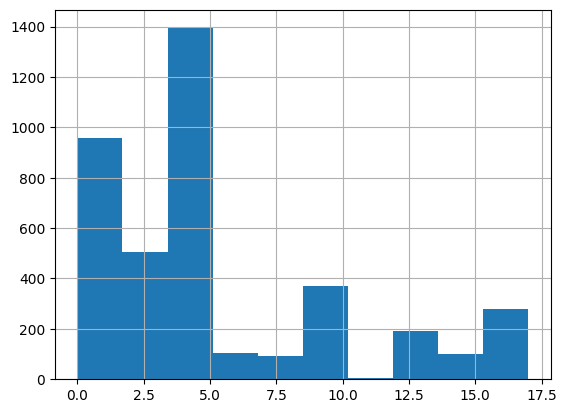

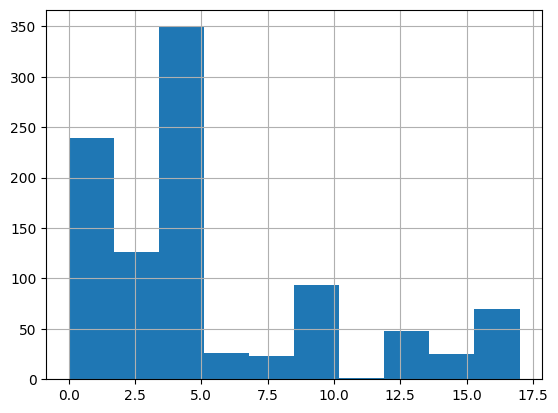

In [354]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

raw_data = train_df
for train_index, test_index in split.split(raw_data, raw_data["label"]):
    strat_train_set = raw_data.loc[train_index]
    strat_test_set = raw_data.loc[test_index]
strat_train_set["label"].hist()
plt.show()
strat_test_set["label"].hist()
plt.show()

In [355]:
len(strat_train_set)

4000

In [356]:
len(strat_test_set)

1000

In [312]:
max_id = x[np.argmax(y)]

train_df.query("id == @max_id")

,id,gender,race,age,path,img_path,state,img_name,label,id_label


In [343]:
x,y = np.unique(sampler_id, return_counts =True)
# plt.bar(x, y)
# plt.show()

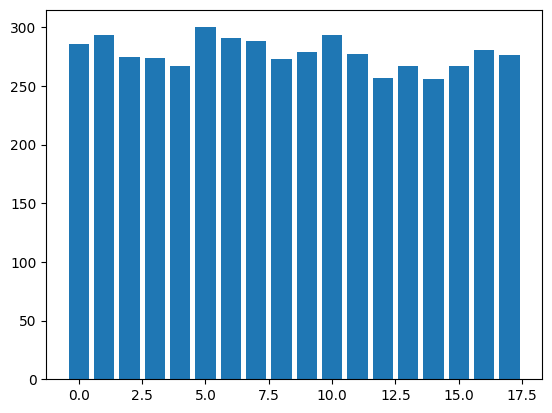

In [344]:
# sample 분포 체크
x,y = np.unique(sampler_label, return_counts =True)
plt.bar(x, y)
plt.show()

In [345]:
import matplotlib.pyplot as plt
# for i, _ in enumerate(range(20)):
sampler_img, sampler_label, sampler_id = next(iter(sampler_loader))
temp += list(sampler_id)
print(len(temp))
uniqe_data, count = np.unique(temp, return_counts =True)
print("{i:4}  ", np.sum(count))
# x,y = np.unique(bar_data, return_counts =True)

# plt.bar(x, y)
# plt.show()

KeyboardInterrupt: 

'004431'

In [346]:
len(sampler_loader.dataset)

5000

In [347]:
BATCH_SIZE = 10000

train_loader = DataLoader(train_set, num_workers=4, batch_size=BATCH_SIZE, drop_last = True, shuffle =True)
valid_loader = DataLoader(valid_set, num_workers=4, batch_size=BATCH_SIZE, drop_last = True, shuffle =True)


In [349]:
import matplotlib.pyplot as plt

# random_img, random_label, random_id  = 
next(iter(train_loader))

# x,y = np.unique(random_label, return_counts =True)

# plt.bar(x, y)
# plt.show()

StopIteration: 

In [2]:
from facenet_pytorch import MTCNN, InceptionResnetV1, fixed_image_standardization, training
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler
from torch import optim
from torch.optim.lr_scheduler import MultiStepLR
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms
import numpy as np
import os

batch_size = 32
epochs = 8
workers = 0 if os.name == 'nt' else 8

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


In [16]:
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)